In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import stats

In [16]:
police_graphs = pd.read_csv('../data/police_eda.csv')

In [17]:
police_graphs.head()

,Unique ID,Date of injury resulting in death (month/day/year),City,State,Zip Code,County,Latitude,Longitude,Agency responsible for death,Cause of death,Intentional Use of Force (Developing),Date (Year)
0,25746,01/01/2000,Willits,CA,95490.0,MENDOCINO,39.470883,-123.361751,Mendocino County Sheriff's Office,Vehicle,Vehicle/Pursuit,2000.0
1,25747,01/01/2000,Detroit,MI,48203.0,WAYNE,42.404526,-83.092274,NaN,Vehicle,Vehicle/Pursuit,2000.0
2,25748,01/01/2000,Detroit,MI,48203.0,WAYNE,42.404526,-83.092274,NaN,Vehicle,Vehicle/Pursuit,2000.0
3,25749,01/01/2000,Carlsbad,NM,88220.0,EDDY,32.450080,-104.237643,Eddy County Sheriff's Office,Vehicle,Vehicle/Pursuit,2000.0
4,2,01/02/2000,Ellenwood,GA,30294.0,DE KALB,33.645164,-84.229413,DeKalb County Sheriff's Office,Gunshot,"Intentional Use of Force, Deadly",2000.0


In [18]:
police_graphs = police_graphs[police_graphs['Date (Year)'] != 2100.0]

In [19]:
year_count = police_graphs.groupby('Date (Year)').count()
year_df = year_count.reset_index()
year_df

,Date (Year),Unique ID,Date of injury resulting in death (month/day/year),City,State,Zip Code,County,Latitude,Longitude,Agency responsible for death,Cause of death,Intentional Use of Force (Developing)
0,2000.0,831,831,830,831,806,830,831,831,826,831,831
1,2001.0,907,907,907,907,894,907,907,907,906,907,907
2,2002.0,961,961,960,961,949,960,961,961,961,961,961
3,2003.0,1008,1008,1007,1008,989,1008,1008,1008,1007,1008,1008
4,2004.0,1014,1014,1010,1014,1000,1013,1014,1014,1014,1014,1014
5,2005.0,1133,1133,1128,1133,1121,1133,1133,1133,1133,1133,1133
6,2006.0,1234,1234,1232,1234,1217,1234,1234,1234,1233,1234,1234
7,2007.0,1210,1210,1208,1210,1196,1208,1210,1210,1205,1210,1210
8,2008.0,1169,1169,1166,1169,1164,1167,1169,1169,1164,1169,1169
9,2009.0,1240,1240,1238,1240,1230,1240,1240,1240,1233,1240,1240


In [20]:
year_df['Date (Year)'] = year_df['Date (Year)'].astype(int)
year_df

,Date (Year),Unique ID,Date of injury resulting in death (month/day/year),City,State,Zip Code,County,Latitude,Longitude,Agency responsible for death,Cause of death,Intentional Use of Force (Developing)
0,2000,831,831,830,831,806,830,831,831,826,831,831
1,2001,907,907,907,907,894,907,907,907,906,907,907
2,2002,961,961,960,961,949,960,961,961,961,961,961
3,2003,1008,1008,1007,1008,989,1008,1008,1008,1007,1008,1008
4,2004,1014,1014,1010,1014,1000,1013,1014,1014,1014,1014,1014
5,2005,1133,1133,1128,1133,1121,1133,1133,1133,1133,1133,1133
6,2006,1234,1234,1232,1234,1217,1234,1234,1234,1233,1234,1234
7,2007,1210,1210,1208,1210,1196,1208,1210,1210,1205,1210,1210
8,2008,1169,1169,1166,1169,1164,1167,1169,1169,1164,1169,1169
9,2009,1240,1240,1238,1240,1230,1240,1240,1240,1233,1240,1240


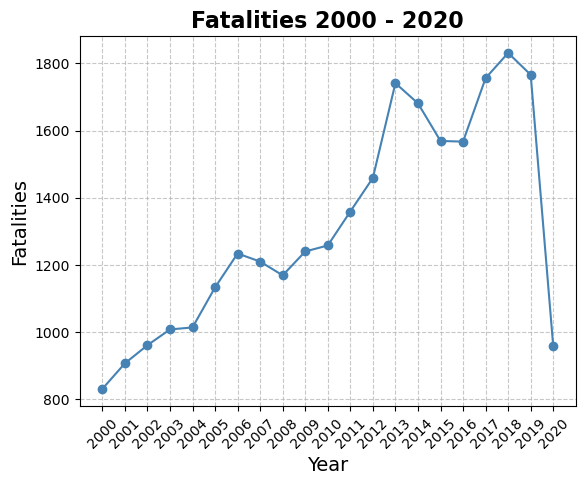

In [31]:
plt.plot(year_df['Date (Year)'], year_df['Unique ID'], marker='o', color='steelblue', linestyle='-')

# Add labels and title
plt.title('Fatalities 2000 - 2020', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Fatalities', fontsize=14)
plt.xticks(rotation=45)
plt.xticks(year_df['Date (Year)'].astype(int))
plt.grid(True, linestyle='--', alpha=0.7)
# Show plot
plt.grid(True)
plt.show()

In [60]:
#Fatalities By State
state_count = police_graphs.groupby('State').count()
state_df = state_count.reset_index()
state_df = state_df.sort_values(by='Unique ID', ascending=False)
state_df

#states with Over 500 Fatalities
top_states = state_df[state_df['Unique ID'] > 500]

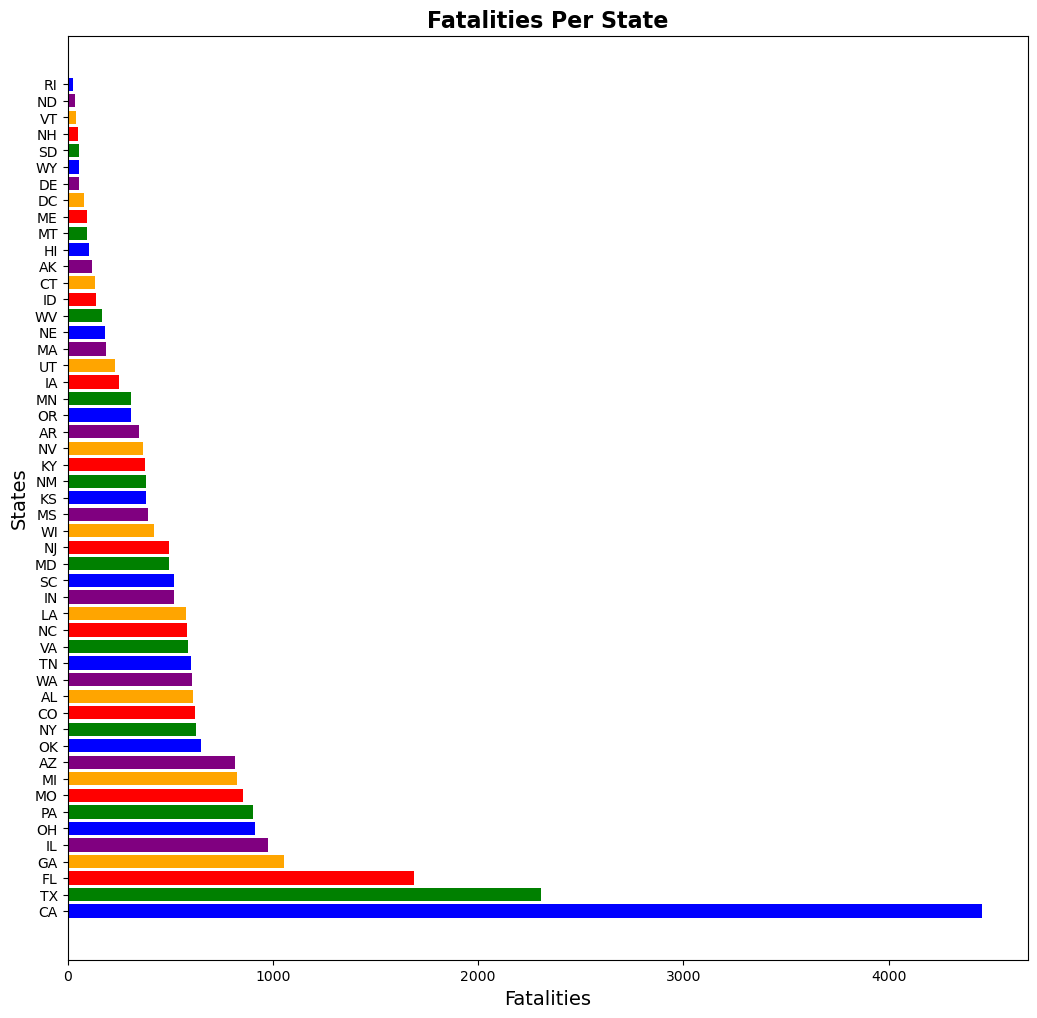

In [55]:
# Plot horizontal bar chart
colors = ['blue', 'green', 'red', 'orange', 'purple']
plt.figure(figsize=(16, 12))
plt.barh(state_df['State'], state_df['Unique ID'], color=colors)

# Add labels and title
plt.xlabel('Fatalities', fontsize=14)
plt.ylabel('States', fontsize=14)
plt.title('Fatalities Per State', fontsize=16, fontweight='bold')


# Set spacing between y-axis ticks
plt.yticks(fontsize=10)  # Adjust font size for state labels
plt.subplots_adjust(left=0.3)  # Adjust left margin to make space for longer state names

# Show plot
plt.show()

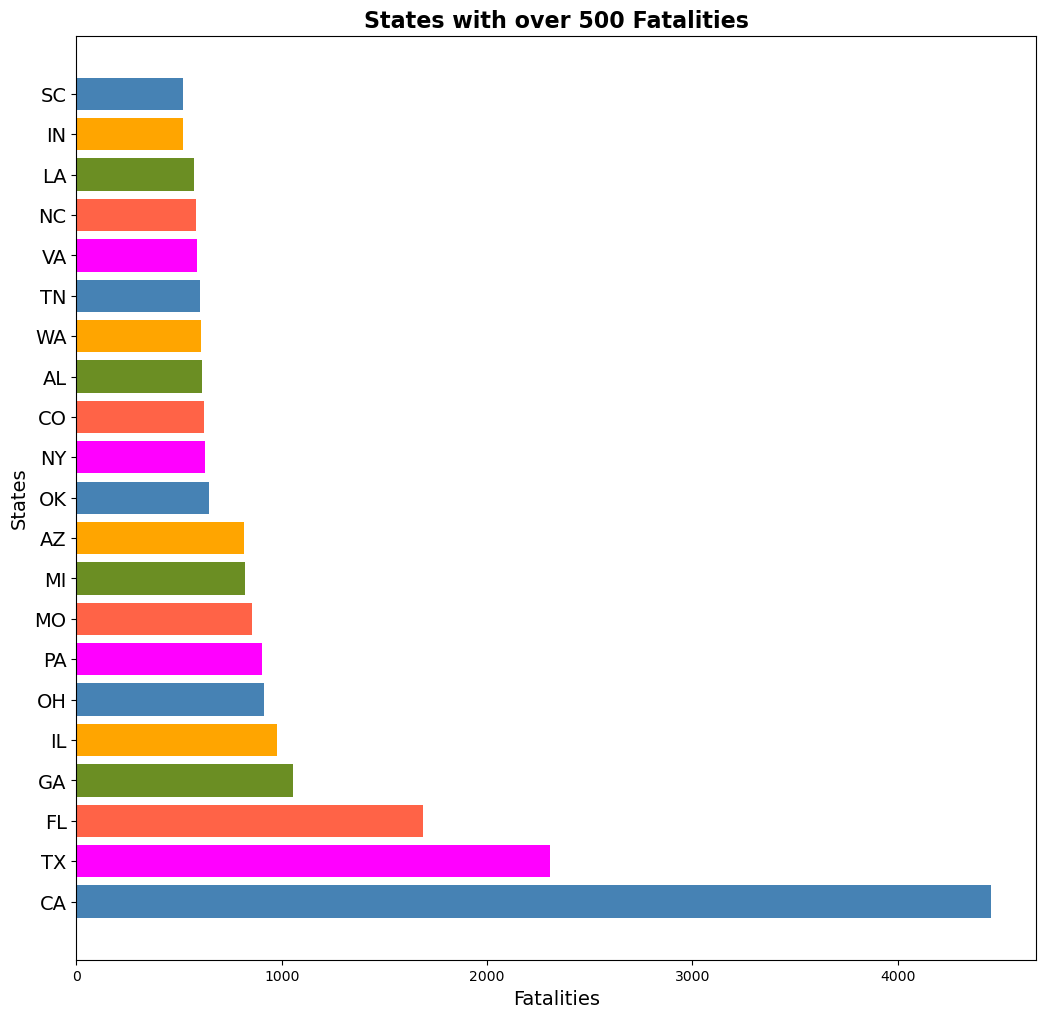

In [85]:
# Plot horizontal bar chart
colors = ['steelblue', 'magenta', 'tomato', 'olivedrab', 'orange']
plt.figure(figsize=(16, 12))
plt.barh(top_states['State'], top_states['Unique ID'], color=colors)

# Add labels and title
plt.xlabel('Fatalities', fontsize=14)
plt.ylabel('States', fontsize=14)
plt.title('States with over 500 Fatalities', fontsize=16, fontweight='bold')


# Set spacing between y-axis ticks
plt.yticks(fontsize=14)  # Adjust font size for state labels
plt.subplots_adjust(left=0.3)  # Adjust left margin to make space for longer state names

# Show plot
plt.show()

In [75]:
#Fatalities By State
county_count = police_graphs.groupby(['State', 'County']).count()
county_df = county_count.reset_index()
county_df = county_df.sort_values(by='Unique ID', ascending=False)


county_df['County_State'] = county_df['County'] + ', ' + county_df['State']
county_df.head()

#Counties and States with Over 500 Fatalities
top_counties = county_df.iloc[:16]
top_counties

,State,County,Unique ID,Date of injury resulting in death (month/day/year),City,Zip Code,Latitude,Longitude,Agency responsible for death,Cause of death,Intentional Use of Force (Developing),Date (Year),County_State
166,CA,LOS ANGELES,1207,1207,1207,1198,1207,1207,1204,1207,1207,1207,"LOS ANGELES, CA"
553,IL,COOK,555,555,555,553,555,555,554,555,555,555,"COOK, IL"
1956,TX,HARRIS,502,502,499,495,502,502,502,502,502,502,"HARRIS, TX"
142,AZ,MARICOPA,467,467,467,459,467,467,467,467,467,467,"MARICOPA, AZ"
182,CA,SAN DIEGO,327,327,327,327,327,327,326,327,327,327,"SAN DIEGO, CA"
181,CA,SAN BERNARDINO,326,326,326,325,326,326,326,326,326,326,"SAN BERNARDINO, CA"
178,CA,RIVERSIDE,278,278,278,277,278,278,276,278,278,278,"RIVERSIDE, CA"
1017,MI,WAYNE,268,268,268,261,268,268,253,268,268,268,"WAYNE, MI"
175,CA,ORANGE,266,266,266,266,266,266,266,266,266,266,"ORANGE, CA"
1453,NV,CLARK,260,260,260,260,260,260,259,260,260,260,"CLARK, NV"


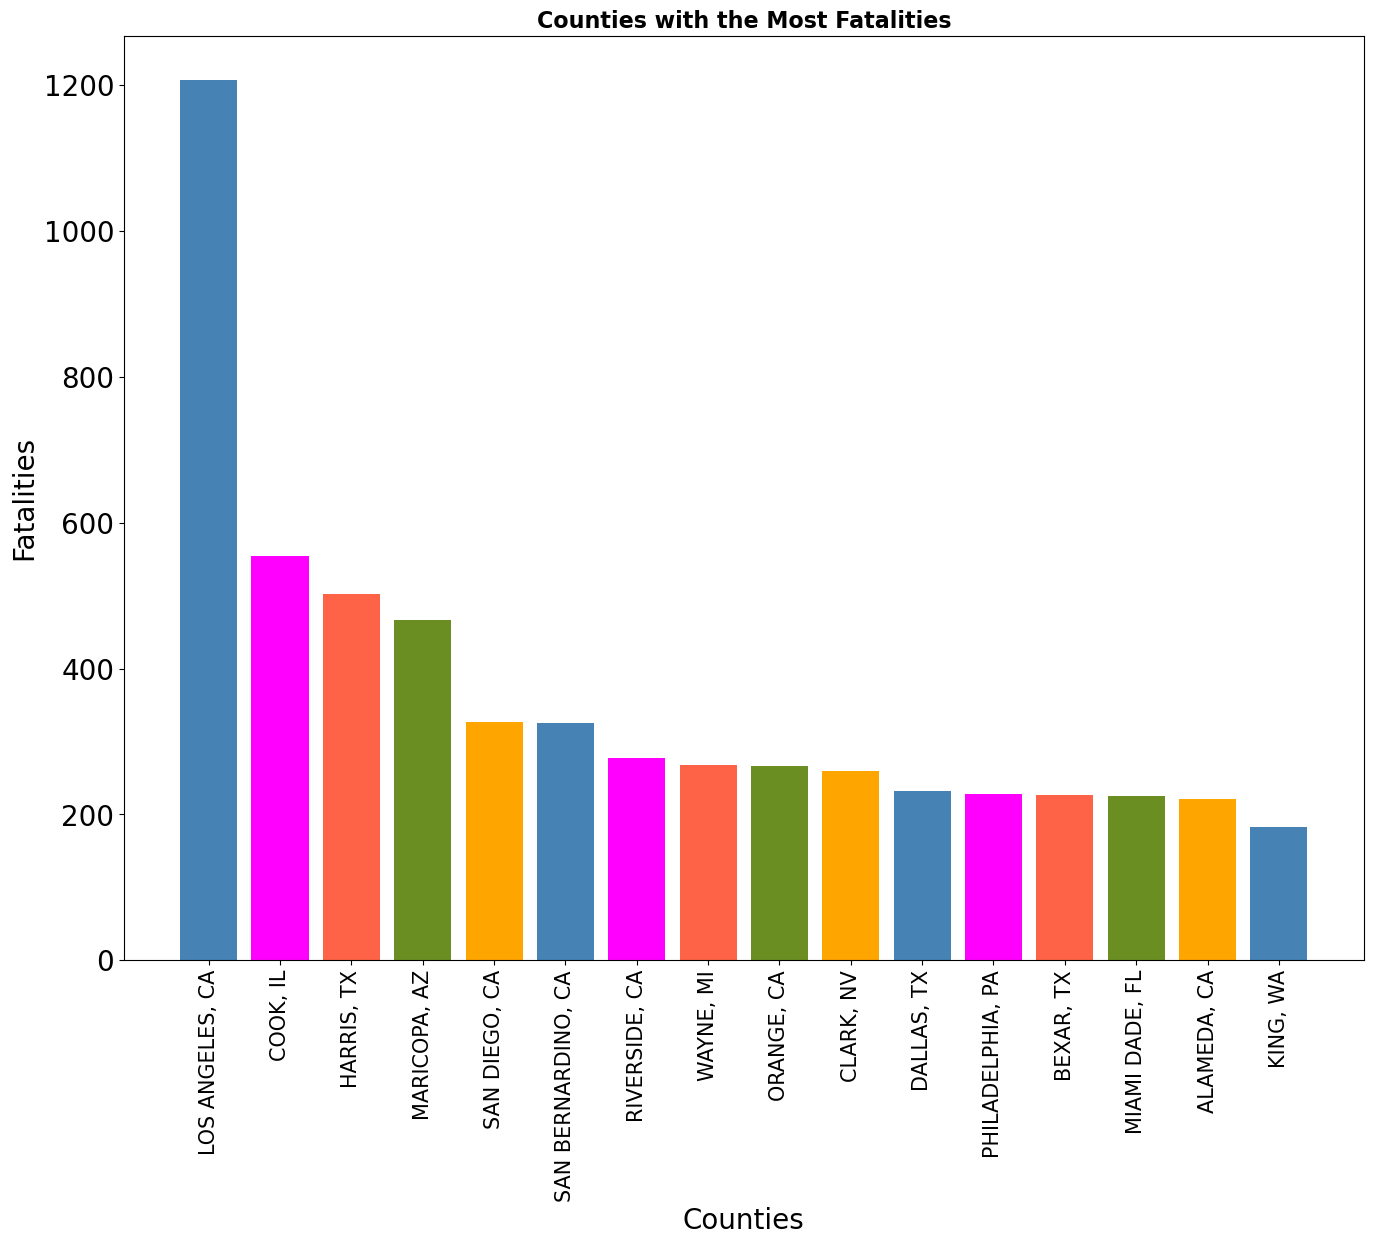

In [84]:
# Plot bar chart
colors = ['steelblue', 'magenta', 'tomato', 'olivedrab', 'orange']
plt.figure(figsize=(16, 12))
plt.bar(top_counties['County_State'], top_counties['Unique ID'], color=colors)

# Add labels and title
plt.xlabel('Counties', fontsize=20)
plt.ylabel('Fatalities', fontsize=20)
plt.title('Counties with the Most Fatalities', fontsize=16, fontweight='bold')

plt.yticks(fontsize=20)
plt.xticks(fontsize=15)
plt.xticks(rotation=90)
plt.show()


In [87]:
import folium
import folium.plugins as plugins
import geopandas as gpd
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster, HeatMapWithTime

In [89]:
police_graphs.head(10)

,Unique ID,Date of injury resulting in death (month/day/year),City,State,Zip Code,County,Latitude,Longitude,Agency responsible for death,Cause of death,Intentional Use of Force (Developing),Date (Year)
0,25746,01/01/2000,Willits,CA,95490.0,MENDOCINO,39.470883,-123.361751,Mendocino County Sheriff's Office,Vehicle,Vehicle/Pursuit,2000.0
1,25747,01/01/2000,Detroit,MI,48203.0,WAYNE,42.404526,-83.092274,NaN,Vehicle,Vehicle/Pursuit,2000.0
2,25748,01/01/2000,Detroit,MI,48203.0,WAYNE,42.404526,-83.092274,NaN,Vehicle,Vehicle/Pursuit,2000.0
3,25749,01/01/2000,Carlsbad,NM,88220.0,EDDY,32.450080,-104.237643,Eddy County Sheriff's Office,Vehicle,Vehicle/Pursuit,2000.0
4,2,01/02/2000,Ellenwood,GA,30294.0,DE KALB,33.645164,-84.229413,DeKalb County Sheriff's Office,Gunshot,"Intentional Use of Force, Deadly",2000.0
5,1,01/02/2000,Sacramento,CA,95823.0,SACRAMENTO,38.473949,-121.433776,Sacramento Police Department,Vehicle,Vehicle/Pursuit,2000.0
6,25750,01/02/2000,Kinston,NC,28501.0,LENOIR,35.271507,-77.587332,Kinston Police Department,Vehicle,Vehicle/Pursuit,2000.0
7,25751,01/02/2000,Kinston,NC,28501.0,LENOIR,35.271507,-77.587332,Kinston Police Department,Vehicle,Vehicle/Pursuit,2000.0
8,25752,01/03/2000,Baltimore,MD,21201.0,BALTIMORE CITY,39.293989,-76.618203,Baltimore Police Department,Vehicle,Vehicle/Pursuit,2000.0
9,25753,01/03/2000,Baltimore,MD,21201.0,BALTIMORE CITY,39.293989,-76.618203,Baltimore Police Department,Vehicle,Vehicle/Pursuit,2000.0


In [92]:
#Heat Map

# Filter out rows with missing latitude or longitude values
police_data = police_graphs.dropna(subset=['Latitude', 'Longitude'])

# Group data by year and count the number of attacks in each location
police_data_grouped = police_data.groupby(['Date (Year)', 'Latitude', 'Longitude']).size().reset_index(name='fatalities')

# Create a base map centered around the mean latitude and longitude
base_map = folium.Map(location=[police_data_grouped['Latitude'].mean(), police_data_grouped['Longitude'].mean()], zoom_start=2)

# Create a list of lists containing location data and attack count for each year
heat_data = [[[row['Latitude'], row['Longitude'], row['fatalities']] for index, row in police_data_grouped[police_data_grouped['Date (Year)'] == year].iterrows()] for year in sorted(police_data_grouped['Date (Year)'].unique())]

# Create HeatMapWithTime layer
HeatMapWithTime(heat_data, radius=15).add_to(base_map)

# Display the map
base_map.save("fatalities_heatmap_with_time.html")

In [94]:
base_map